### Problema de regresión

Un problema de regresión es un tipo de problema en el campo del aprendizaje automático y la estadística donde el objetivo es predecir un valor numérico basado en una serie de variables de entrada. Se busca establecer una relación entre las variables de entrada (o características) y una variable de salida (o objetivo) que sea continua. 

Supongamos que queremos predecir el precio de una casa basado en características como el tamaño del terreno, el número de habitaciones, la ubicación, etc. Este sería un problema de regresión, ya que el precio de la casa es una variable continua que queremos predecir.

En un problema de regresión, el objetivo es encontrar una función matemática que mejor se ajuste a los datos de entrenamiento (observados) y que pueda generalizar bien para hacer predicciones precisas sobre datos no observados. Algunos algoritmos comunes utilizados en problemas de regresión incluyen la regresión lineal, regresión polinomial, regresión de vecinos más cercanos (KNN), árboles de decisión y redes neuronales, entre otros.

### Regresión lineal 

La regresión lineal es un método estadístico utilizado para modelar la relación entre una variable dependiente (o respuesta) y una o más variables independientes (o predictores). Se basa en la suposición de que esta relación puede aproximarse mediante una función lineal. En otras palabras, la regresión lineal busca encontrar la "línea de mejor ajuste" que minimiza la distancia entre los puntos de datos observados y la línea predicha por el modelo. Esto permite hacer predicciones sobre el valor de la variable dependiente en función de los valores de las variables independientes. La regresión lineal es ampliamente utilizada en diversas áreas, como la econometría, la ciencia de datos, la ingeniería y la investigación social, entre otras.

### Cuál es la línea de mejor ajuste

|   altura (pulgadas) |   peso (lbs) |
|---------:|---------:|
|       63 |      127 |
|       64 |      121 |
|       66 |      142 |
|       69 |      157 |
|       69 |      162 |
|       71 |      156 |
|       71 |      169 |
|       72 |      165 |
|       73 |      181 |
|       75 |      208 |

Comparemos los siguientes modelos:


- **Modelo 1:** $\text{peso} = -266.53 + 6.1376 \times \text{altura}$

- **Modelo 2:** $\text{peso} = -331.2 + 7.1 \times \text{altura}$

- ¿Cuál de los dos modelos es mejor?
  - Discuta a partir del gráfico a continuación.
  - ¿Cómo mediría la calidad del modelo?

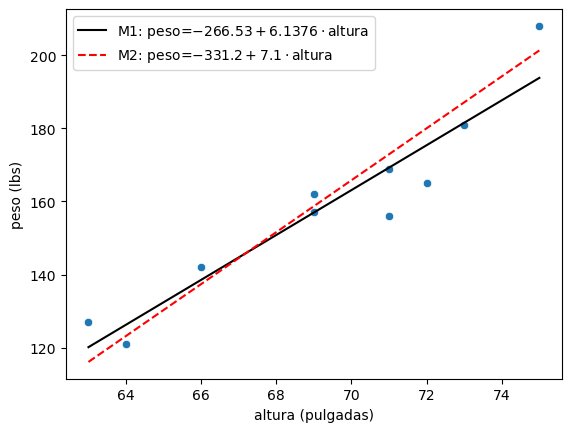

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(np.matrix("""63,127;64,121;66,142;
                       69,157;69,162;71,156;71,169;
                       72,165;73,181;75,208"""),
             columns = ["altura (pulgadas)", "peso (lbs)"]
            )

peso_modelo_1 = -266.53+6.1376*data["altura (pulgadas)"]

peso_modelo_2 = -331.2 + 7.1*data["altura (pulgadas)"]

sns.scatterplot(data, x="altura (pulgadas)", y="peso (lbs)")
plt.plot(data["altura (pulgadas)"], peso_modelo_1, "k", label=r"M1: peso=$-266.53+6.1376 \cdot$altura")
plt.plot(data["altura (pulgadas)"], peso_modelo_2, "--r", label=r"M2: peso=$-331.2 + 7.1 \cdot$altura")
plt.legend()
plt.show()

### Evaluemos los modelos

- **Sum of Squares Error**

Para esto usaremos la suma de los cuadrados de los errores (SSE, por sus siglas en inglés, Sum of Squares Error) es una medida que se utiliza para evaluar la bondad de ajuste de un modelo de regresión. Representa la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo para cada punto de datos en el conjunto de datos de entrenamiento. Matemáticamente, la SSE se calcula como:

$$ SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Donde:

- $ n $ es el número de observaciones en el conjunto de datos de entrenamiento,
- $ y_i $ es el valor real de la variable dependiente para la $i$-ésima observación,
- $ \hat{y}_i $ es el valor predicho por el modelo para la $i$-ésima observación.

La SSE cuantifica la cantidad total de variabilidad no explicada por el modelo de regresión. Un valor más bajo de SSE indica un mejor ajuste del modelo a los datos. La SSE se utiliza comúnmente junto con otras métricas, como el coeficiente de determinación ($ R^2 $), para evaluar la calidad del ajuste del modelo de regresión.

- **Mean Squared Error**

El Error Cuadrático Medio (MSE, por sus siglas en inglés, Mean Squared Error) se calcula a partir de la Suma de los Cuadrados de los Errores (SSE, por sus siglas en inglés, Sum of Squares Error). MSE es simplemente la SSE promediada sobre el número total de observaciones en el conjunto de datos. 

Matemáticamente, el MSE se define como:

$$ MSE = \frac{1}{n} \times SSE $$

Donde:
- $ n $ es el número de observaciones en el conjunto de datos.

El MSE representa el promedio de los errores cuadráticos individuales entre los valores observados y los valores predichos por el modelo de regresión. Es una medida comúnmente utilizada para evaluar la precisión de un modelo de regresión, donde valores más bajos indican un mejor ajuste del modelo a los datos.

In [3]:
data["M1_peso"] = peso_modelo_1
data["M2_peso"] = peso_modelo_2

data["M1_error"] = data["peso (lbs)"] - data["M1_peso"]  # Error y_obs - y_mod
data["M2_error"] = data["peso (lbs)"] - data["M2_peso"]  # Error y_obs - y_mod

data["M1_SE"] = data["M1_error"]**2  # Error elevado al cuadrado (**2)
data["M2_SE"] = data["M2_error"]**2  # Error elevado al cuadrado (**2)

print("SSE:", "\nModelo 1:", np.array(data[["M1_SE"]]).sum(), 
      "\nModelo 2:", np.array(data[["M2_SE"]]).sum())

print("MSE:", "\nModelo 1:", np.array(data[["M1_SE"]]).mean(), 
      "\nModelo 2:", np.array(data[["M2_SE"]]).mean())

data

SSE: 
Modelo 1: 597.3862748799996 
Modelo 2: 766.5099999999994
MSE: 
Modelo 1: 59.73862748799996 
Modelo 2: 76.65099999999994


,altura (pulgadas),peso (lbs),M1_peso,M2_peso,M1_error,M2_error,M1_SE,M2_SE
0,63,127,120.1388,116.1,6.8612,10.9,47.076065,118.81
1,64,121,126.2764,123.2,-5.2764,-2.2,27.840397,4.84
2,66,142,138.5516,137.4,3.4484,4.6,11.891463,21.16
3,69,157,156.9644,158.7,0.0356,-1.7,0.001267,2.89
4,69,162,156.9644,158.7,5.0356,3.3,25.357267,10.89
5,71,156,169.2396,172.9,-13.2396,-16.9,175.287008,285.61
6,71,169,169.2396,172.9,-0.2396,-3.9,0.057408,15.21
7,72,165,175.3772,180.0,-10.3772,-15.0,107.686280,225.00
8,73,181,181.5148,187.1,-0.5148,-6.1,0.265019,37.21
9,75,208,193.7900,201.3,14.2100,6.7,201.924100,44.89


- **Discuta:** cuál de los dos modelos es mejor.
  - ¿Por qué?

### Calculemos la mejor línea de ajuste

Para simplificar la derivación de $ m $ y $ b $ en la regresión lineal utilizando el método de mínimos cuadrados, comenzamos con las siguientes ecuaciones:

1. Tenemos que la ecuación de la línea de mejor ajuste es:
$$ y = b_0 + b_1 \cdot x $$

2. El error cuadrático medio (SSE):
$$ \text{SSE} = Q = \sum_{i=1}^{n} (y_i - (b_0 + b_1 \cdot x_i ))^2 $$

Donde:
- $ n $ es el número de observaciones,
- $ (x_i, y_i) $ son los puntos observados.

Para minimizar la función de costo $ Q $, que es la suma de los cuadrados de los errores, con respecto a los parámetros $ b_0 $ y $ b_1 $, tomamos las derivadas parciales de $ Q $ con respecto a $ b_0 $ y $ b_1 $, y luego igualamos a cero.

La función de costo $ Q $ se define como:

$$ Q = \sum_{i=1}^{n}(y_i - (b_0 + b_1 x_i))^2 $$

Tomamos la derivada parcial de $ Q $ con respecto a $ b_0 $:

$$ \frac{\partial Q}{\partial b_0} = -2 \sum_{i=1}^{n} (y_i - (b_0 + b_1 x_i)) $$

$$ \frac{\partial Q}{\partial b_0} = -2 \sum_{i=1}^{n} (y_i - b_0 - b_1 x_i) $$

Para minimizar $ Q $, igualamos la derivada parcial con respecto a $ b_0 $ a cero:

$$ -2 \sum_{i=1}^{n} (y_i - b_0 - b_1 x_i) = 0 $$

$$ \sum_{i=1}^{n} y_i - \sum_{i=1}^{n} b_0 - b_1 \sum_{i=1}^{n} x_i = 0 $$

$$ \sum_{i=1}^{n} y_i - n b_0 - b_1 \sum_{i=1}^{n} x_i = 0 $$

$$ b_0 = \frac{\sum_{i=1}^{n} y_i - b_1 \sum_{i=1}^{n} x_i}{n} $$

$$ b_0 = \bar{y} - b_1 \cdot \bar{x} $$

Luego, tomamos la derivada parcial de $ Q $ con respecto a $ b_1 $:

$$ \frac{\partial Q}{\partial b_1} = -2 \sum_{i=1}^{n} x_i (y_i - (b_0 + b_1 x_i)) $$

$$ \frac{\partial Q}{\partial b_1} = -2 \sum_{i=1}^{n} x_i (y_i - b_0 - b_1 x_i) $$

Para minimizar $ Q $, igualamos la derivada parcial con respecto a $ b_1 $ a cero:

$$ -2 \sum_{i=1}^{n} x_i (y_i - b_0 - b_1 x_i) = 0 $$

$$ \sum_{i=1}^{n} ( x_i y_i - b_0 x_i - b_1 x_i^2) = 0 $$

$$ \sum_{i=1}^{n} ( x_i y_i - (\bar{y} - b_1 \bar{x}) x_i - b_1 x_i^2) = 0 $$

$$ \sum_{i=1}^{n} ( x_i y_i - \bar{y}x_i + b_1 \bar{x}x_i - b_1 x_i^2) = 0 $$

$$  \sum_{i=1}^{n} (x_i y_i - x_i \bar{y}) - b_1 \sum_{i=1}^{n} (x_i^2 - x_i \bar{x}) = 0 $$

$$ b_1 = \frac{ \sum_{i=1}^{n} (x_i y_i - x_i \bar{y}) }{\sum_{i=1}^{n} (x_i^2 - x_i \bar{x})} $$ 

$$ b_1 = \frac{ \sum_{i=1}^{n} (x_i y_i) - n \bar{x} \bar{y} }{\sum_{i=1}^{n} (x_i^2) - n \bar{x}^2 } $$ 

Podemos expresar $b_1$ de varias maneras, por ejemplo si notamos que:

$$ \sum_{i=1}^{n}(\bar{x}^2 - x_i \bar{x}) = 0 , \quad \sum_{i=1}^{n} (\bar{x} \bar{y} - y_i \bar{x}) = 0.  $$

Por tanto $b_1$ puede ser expresado como:

$$ b_1 = \frac{ \sum_{i=1}^{n} (x_i y_i - x_i \bar{y}) + \sum_{i=1}^{n} (\bar{x} \bar{y} - y_i \bar{x})}
{\sum_{i=1}^{n} (x_i^2 - x_i \bar{x}) + } $$ 

$$ b_1=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2} $$

- Revise: https://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf

- **Discuta:** Cómo interpreta los coeficientes $b_1$ y $b_0$.

In [18]:
# Read the data from the web and describe
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Prestige.csv")

# We will model: income ~ education
data = data[['education', 'women', 'prestige', 'income']]

print(data.describe())
data.head()

        education       women    prestige        income
count  102.000000  102.000000  102.000000    102.000000
mean    10.738039   28.979020   46.833333   6797.901961
std      2.728444   31.724931   17.204486   4245.922227
min      6.380000    0.000000   14.800000    611.000000
25%      8.445000    3.592500   35.225000   4106.000000
50%     10.540000   13.600000   43.600000   5930.500000
75%     12.647500   52.202500   59.275000   8187.250000
max     15.970000   97.510000   87.200000  25879.000000


,education,women,prestige,income
0,13.11,11.16,68.8,12351
1,12.26,4.02,69.1,25879
2,12.77,15.70,63.4,9271
3,11.42,9.11,56.8,8865
4,14.62,11.68,73.5,8403


                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     260.8
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.29e-29
Time:                        12:10:28   Log-Likelihood:                -369.00
No. Observations:                 102   AIC:                             742.0
Df Residuals:                     100   BIC:                             747.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7320      3.677     -2.919      0.0

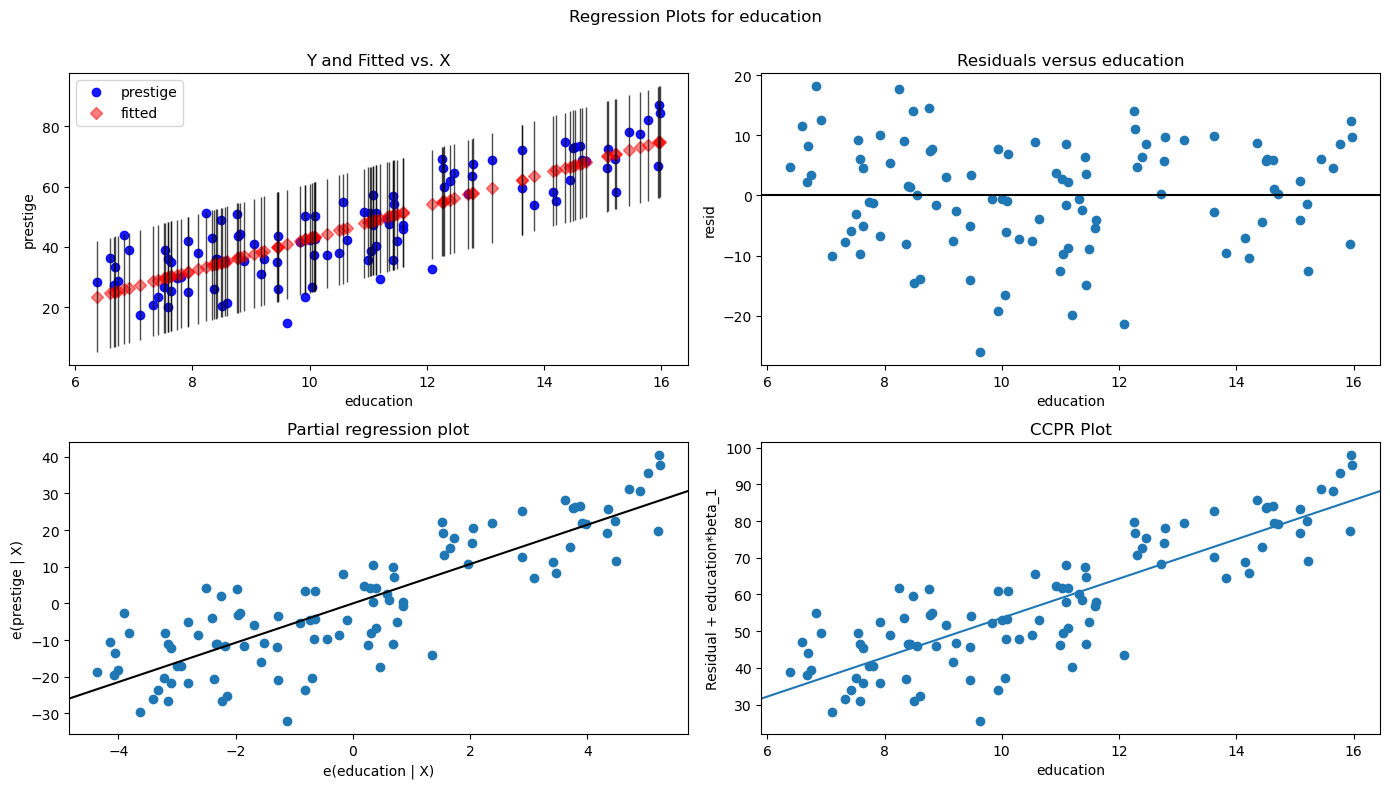

In [19]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

# We will model: income ~ education
# fit simple linear regression model 
linear_model = ols('prestige ~ education', 
                   data=data).fit() 

# display model summary 
print(linear_model.summary()) 
  
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(linear_model, 
                                    'education', 
                                    fig=fig) 

### Supuestos 

Los supuestos de una regresión lineal son:

1. **Linealidad:** La relación entre las variables independientes y la variable dependiente es lineal.
2. **Homocedasticidad:** La varianza de los errores es constante para todos los valores de las variables independientes.
3. **Independencia de errores:** Los errores de la regresión no están correlacionados entre sí.
4. **Normalidad de errores:** Los errores de la regresión siguen una distribución normal.
5. **Independencia de las variables independientes:** Las variables independientes no deben estar correlacionadas entre sí (ausencia de multicolinealidad).

Es importante verificar estos supuestos antes de interpretar los resultados de una regresión lineal para asegurar que los resultados sean válidos y confiables.

### Linealidad

Podemos comprobar la linealidad en una regresión lineal de varias maneras:

1. **Gráficos de dispersión**: Grafica los valores observados de la variable dependiente frente a cada variable independiente. Si la relación entre las variables es lineal, los puntos deberían formar una tendencia aproximadamente lineal en el gráfico.

2. **Gráficos de residuos vs. ajustes**: Grafica los residuos (diferencia entre los valores observados y los valores predichos) frente a los valores ajustados (valores predichos). Si no hay patrones claros en la distribución de los residuos, es una indicación de que la relación es lineal.

3. **Gráficos de normalidad de los residuos**: Si los residuos siguen una distribución normal, puede indicar que la relación entre las variables es lineal. Esto se puede verificar mediante gráficos Q-Q (quantile-quantile) o histogramas de los residuos.

4. **Pruebas estadísticas**: Aunque no es una comprobación directa de la linealidad, algunas pruebas estadísticas pueden ayudar a evaluar la relación entre las variables. Por ejemplo, la prueba de Kolmogorov-Smirnov o la prueba de Shapiro-Wilk pueden verificar si los residuos siguen una distribución normal.

Al realizar estas comprobaciones, es importante interpretar los resultados de manera conjunta y no confiar únicamente en una prueba o gráfico. Si encuentras evidencia de no linealidad, podrías considerar transformar las variables o explorar modelos de regresión no lineal.

<Axes: xlabel='education', ylabel='prestige'>

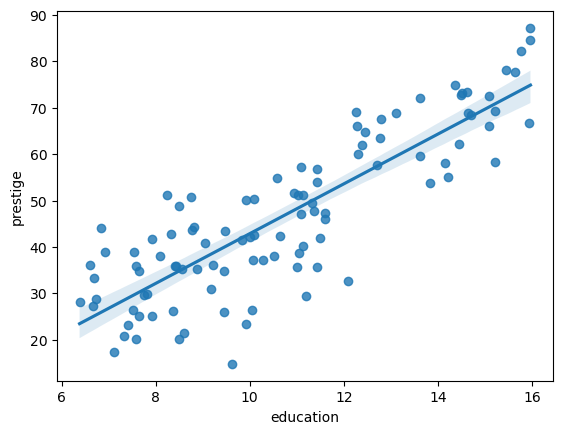

In [20]:
sns.regplot(data, x="education", y="prestige")

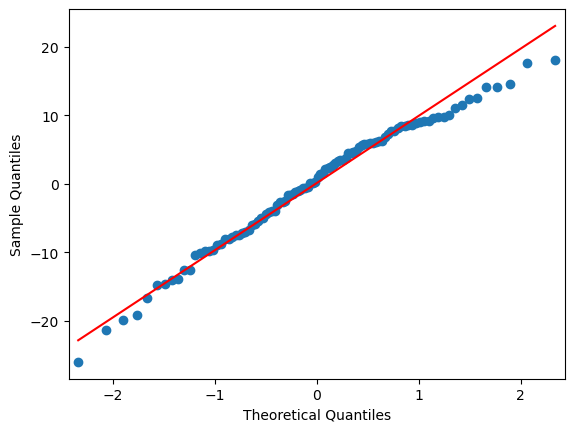

In [21]:
fig = sm.qqplot(linear_model.resid, line='q')

<Axes: xlabel='education', ylabel='prestige'>

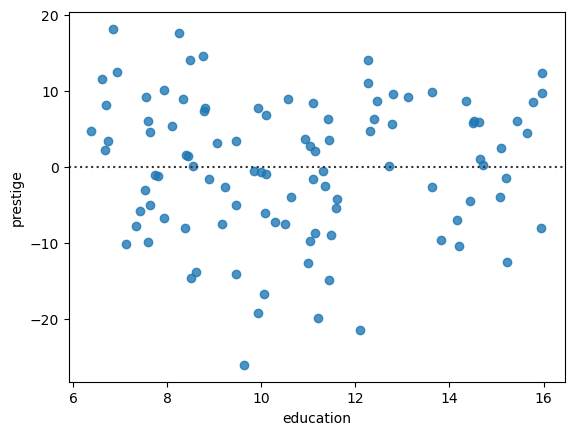

In [22]:
sns.residplot(data=data, x="education", y="prestige")

<Axes: xlabel='education', ylabel='prestige'>

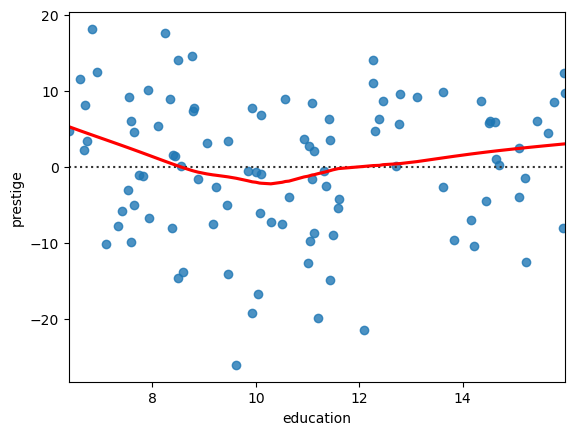

In [23]:
sns.residplot(data=data, x="education", y="prestige", lowess=True, line_kws=dict(color="r"))

El ejemplo a continuación muestra una violación a los supuestos de la regresión lineal.

<Axes: xlabel='horsepower', ylabel='mpg'>

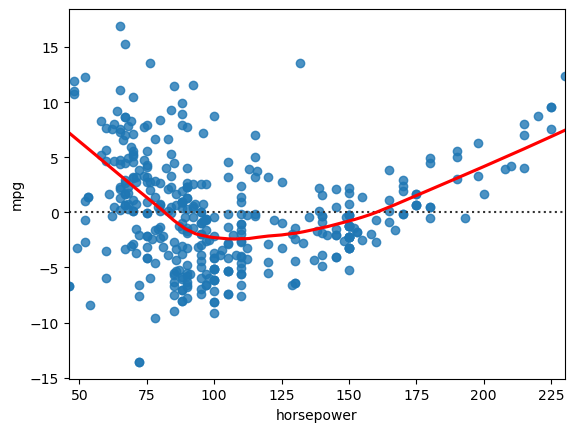

In [38]:
mpg = sns.load_dataset("mpg")
sns.residplot(data=mpg, x="horsepower", y="mpg", lowess=True, line_kws=dict(color="r"))

### Regresión lineal múltiple

Para encontrar matemáticamente los coeficientes de una regresión lineal múltiple, seguimos estos pasos:

1. **Preparación de datos**: Tenemos un conjunto de datos con $ n $ observaciones y $ p $ variables independientes (predictoras) $ x_1, x_2, ..., x_p $, y una variable dependiente $ y $.

2. **Formulación del modelo**: El modelo de regresión lineal múltiple se define como:

   $$ y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_p x_p + \varepsilon $$

   Donde $ b_0 $ es la intersección (también conocida como término constante) y $ b_1, b_2, ..., b_p $ son los coeficientes asociados a cada variable independiente, y $ \varepsilon $ representa el error aleatorio.

3. **Mínimos cuadrados ordinarios (OLS)**: El método más común para encontrar los coeficientes es el método de mínimos cuadrados ordinarios (OLS). Este método minimiza la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

4. **Derivadas parciales**: Para minimizar la función de costo (suma de los cuadrados de los errores), tomamos las derivadas parciales de la función de costo con respecto a cada coeficiente $ b_0, b_1, ..., b_p $ y las igualamos a cero.

5. **Resolución de ecuaciones**: Resolvemos el sistema de ecuaciones resultante para encontrar los valores óptimos de los coeficientes. En la regresión lineal simple, esto puede hacerse de manera analítica. En la regresión lineal múltiple, puede requerir métodos numéricos más avanzados.

6. **Interpretación**: Una vez que tenemos los coeficientes estimados, los interpretamos para entender la relación entre las variables independientes y la variable dependiente. Por ejemplo, un coeficiente positivo indica una relación positiva entre la variable independiente correspondiente y la variable dependiente, y viceversa.

Al seguir estos pasos, podemos encontrar matemáticamente los coeficientes de una regresión lineal múltiple y utilizar el modelo resultante para hacer predicciones sobre nuevos datos.

Para encontrar los coeficientes de una regresión lineal múltiple utilizando matrices, seguimos estos pasos:

1. **Matriz de diseño**: Creamos una matriz de diseño $ X $ que contiene todas las variables independientes (predictoras) del modelo, donde cada fila representa una observación y cada columna representa una variable independiente. Añadimos una columna de unos al principio para representar el término constante $ b_0 $.

   $$ X = \begin{bmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1p} \\ 1 & x_{21} & x_{22} & \cdots & x_{2p} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \cdots & x_{np} \end{bmatrix} $$

2. **Vector de respuestas**: Creamos un vector $ y $ que contiene los valores de la variable dependiente para cada observación.

   $$ y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $$

3. **Coeficientes desconocidos**: Creamos un vector $ \beta $ que contiene los coeficientes desconocidos $ b_0, b_1, ..., b_p $.

   $$ \beta = \begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_p \end{bmatrix} $$

4. **Ecuación del modelo**: La ecuación del modelo se puede representar de manera matricial como:

   $$ y = X \beta + \varepsilon $$

   Donde $ \varepsilon $ es el vector de errores.

5. **Estimación de coeficientes**: Utilizamos el método de mínimos cuadrados para estimar los coeficientes $ \beta $ minimizando la suma de los cuadrados de los errores $ \varepsilon $. La solución para $ \beta $ se puede encontrar utilizando la fórmula:

   $$ \hat{\beta} = (X^T X)^{-1} X^T y $$

   Donde $ (\cdot)^T $ representa la matriz transpuesta y $ (\cdot)^{-1} $ representa la matriz inversa.

6. **Interpretación**: Una vez que tenemos $ \hat{\beta} $, podemos interpretar los coeficientes para entender la relación entre las variables independientes y la variable dependiente.

Este enfoque basado en matrices nos proporciona una manera eficiente y elegante de encontrar los coeficientes de una regresión lineal múltiple, especialmente cuando trabajamos con conjuntos de datos grandes y complejos.

In [5]:
# Read the data from the web and describe
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Prestige.csv")
data.head()

,education,income,women,prestige,census,type
0,13.11,12351,11.16,68.8,1113,prof
1,12.26,25879,4.02,69.1,1130,prof
2,12.77,9271,15.70,63.4,1171,prof
3,11.42,8865,9.11,56.8,1175,prof
4,14.62,8403,11.68,73.5,2111,prof


In [6]:
# We will model: income ~ education + prestige + women

data = data[['education', 'women', 'prestige', 'income']]

print(data.describe())
data.head()

        education       women    prestige        income
count  102.000000  102.000000  102.000000    102.000000
mean    10.738039   28.979020   46.833333   6797.901961
std      2.728444   31.724931   17.204486   4245.922227
min      6.380000    0.000000   14.800000    611.000000
25%      8.445000    3.592500   35.225000   4106.000000
50%     10.540000   13.600000   43.600000   5930.500000
75%     12.647500   52.202500   59.275000   8187.250000
max     15.970000   97.510000   87.200000  25879.000000


,education,women,prestige,income
0,13.11,11.16,68.8,12351
1,12.26,4.02,69.1,25879
2,12.77,15.70,63.4,9271
3,11.42,9.11,56.8,8865
4,14.62,11.68,73.5,8403


In [7]:
data.isnull().sum()

education    0
women        0
prestige     0
income       0
dtype: int64

/Users/salva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


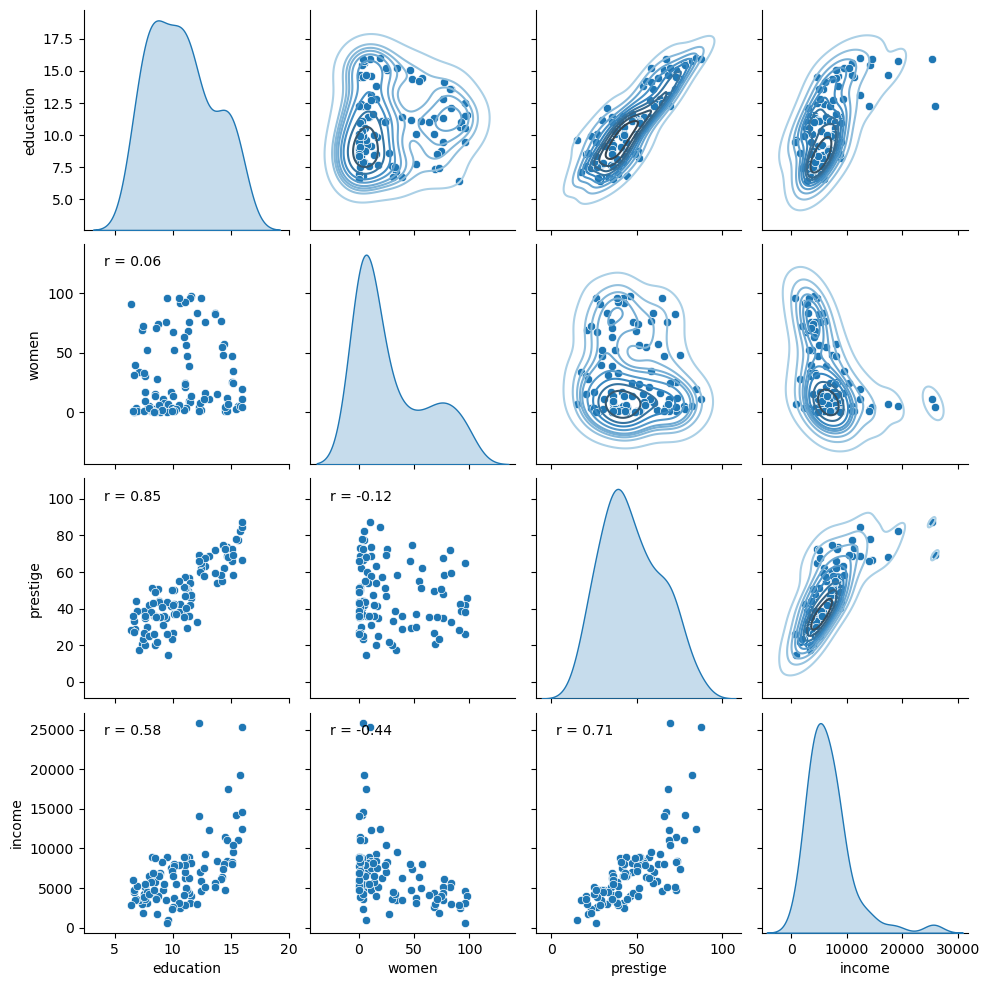

<Axes: >

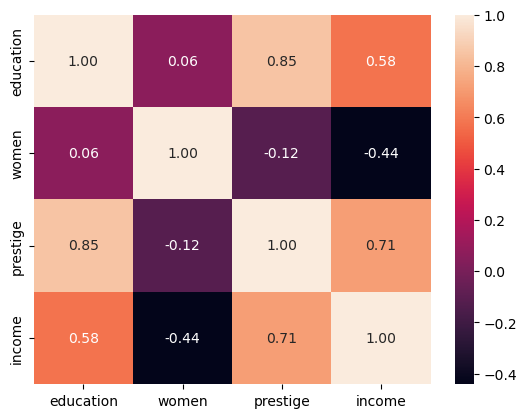

In [8]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(data, diag_kind="kde")
g.map_upper(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.show()

sns.heatmap(data.corr(), annot=True, fmt=".2f")

In [27]:
# We are going to build a linear model from our data
# and evaluate the variables importance
# Let's build Model 1
X_data = data[['education', 'women', 'prestige']]
y = data[['income']]

# sm does not include intercept by default we have to manually add it 
X2 = sm.add_constant(X_data)
est = sm.OLS(y, X2)  # Ordinary least squares
est2 = est.fit()  # fit model
print(est2.summary())
print("Residual standard error:", np.sqrt(est2.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     58.89
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           7.51e-22
Time:                        12:19:11   Log-Likelihood:                -943.75
No. Observations:                 102   AIC:                             1895.
Df Residuals:                      98   BIC:                             1906.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -253.8497   1086.157     -0.234      0.8

- We have that R2 = 0.6432, thus 64.32% of the variance of income, is explained by the model (income ~ education + prestige + women).

- What is the predictors importance? We look for the value of P>|t|.

- We will build another model leaving out education. 

In [7]:
# Model 2

X_data = data[['women', 'prestige']]
y = data[['income']]

# sm does not include intercept by default we have to manually add it 
X2 = sm.add_constant(X_data)
est = sm.OLS(y, X2)  # Ordinary least squares
est2 = est.fit()  # fit model
print(est2.summary())
print("Residual standard error:", np.sqrt(est2.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     87.98
Date:                Sat, 03 Mar 2018   Prob (F-statistic):           1.09e-22
Time:                        21:49:25   Log-Likelihood:                -944.21
No. Observations:                 102   AIC:                             1894.
Df Residuals:                      99   BIC:                             1902.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        431.5744    807.630      0.534      0.5

Model 2 is better than Model 1, it has a larger F value. 
The Residual standard error and Adj. R-squared
are slightly improved.
It would be a good idea to perform an atypical values analysis.

Look for the analysis of variance (ANOVA) F-test, to assess the model,
and P>|t|, to assess the variable importance (coefficients)
See: 
- http://blog.minitab.com/blog/adventures-in-statistics-2/what-is-the-f-test-of-overall-significance-in-regression-analysis
- http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
- http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
- https://onlinecourses.science.psu.edu/stat857/node/45

# We will perform a machine learning analysis using a linear regression

In [8]:
# Read the data from the web and assign columns names
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [9]:
# Describe the data
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
# We can use groupby to describe mpg grouped by cylinders

data.groupby(['cylinders']).mpg.describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3.0,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4.0,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5.0,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6.0,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8.0,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


In [11]:
# Let's check for nan values

print(data.isnull().sum())

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64


In [12]:
# Remove missing values
data = data.dropna(axis=0, how='any')

# Remove the column car_name (why we are doing this?)
data = data.drop('car_name', axis=1)

In [13]:
# Let's check our data
print(data.isnull().sum())
data.head()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [14]:
# origin is categorical but in our data was given as numeric
# Let's transform our data
# 1: 'america', 2: 'europe', 3: 'asia'

data['origin'] = data['origin'].replace({1.0: 'america', 2.0: 'europe', 3.0: 'asia'})

# We will create dummy variables for origin
# See: https://www.moresteam.com/whitepapers/download/dummy-variables.pdf
data = pd.get_dummies(data, columns=['origin'])

print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   70.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   70.0   
2  18.0        8.0         318.0       150.0  3436.0          11.0   70.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   70.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   70.0   

   origin_america  origin_asia  origin_europe  
0               1            0              0  
1               1            0              0  
2               1            0              0  
3               1            0              0  
4               1            0              0  


In [15]:
# Split the data in train and test sets
from sklearn.model_selection import train_test_split

X = data.drop('mpg', axis=1)
y = data[['mpg']]  # the double brackets generates a column

# Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression

# Build the regressor and fit our train data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Print the results of the model
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The coefficient for cylinders is -0.2463375586996167
The coefficient for displacement is 0.02387033830714957
The coefficient for horsepower is -0.006017238617773325
The coefficient for weight is -0.007336432943899315
The coefficient for acceleration is 0.21897778104124824
The coefficient for model is 0.7851801072779493
The coefficient for origin_america is -1.7624934092199247
The coefficient for origin_asia is 0.8096269190858489
The coefficient for origin_europe is 0.9528664901340749
The intercept for our model is -19.809183848815866


In [18]:
# How good is our model?
print("El valor de R2 es:", regression_model.score(X_test, y_test))

# 82.85% of the variability in Y can be explained by X

El valor de R2 es: 0.8285231316459774


In [19]:
from sklearn.metrics import mean_squared_error

# We can use our model to predict 
y_predict = regression_model.predict(X_test)

# How good is our prediction 
regression_model_mse = mean_squared_error(y_predict, y_test)

print("MSE:", regression_model_mse)

print("RMSE:", np.sqrt(regression_model_mse))
# We are an average of 3.50 mpg away from the truth mpg when making predictions on our test set.

MSE: 12.230963834602667
RMSE: 3.4972794904900963


## Making Predictions

We can use our model to predict the miles per gallon for another, unseen car. Let’s give it a go on the following:

- Cylinders – 4
- Displacement – 121
- Horsepower – 110
- Weight – 2800
- Acceleration – 15.4
- Year – 81
- Origin – Asia

In [20]:
regression_model.predict([[4, 121, 110, 2800, 15.4, 81, 0, 1, 0]])

array([[28.6713418]])

The car above is the information for a Saab 900s and it turns out that this is quite close to the actual mpg of 26 mpg for this car.

If you are interested in prediction intervals try:
http://markthegraph.blogspot.com/2015/05/using-python-statsmodels-for-ols-linear.html
or
https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels

In [21]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          1.79e-139
Time:                        21:49:55   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.0951      3.482     -3.

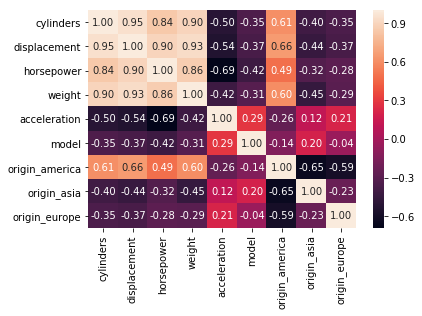

In [22]:
sns.heatmap(X.corr(), annot=True, fmt=".2f")